# In Class Notebook, Week 05

You can always paste the URL of this notebook (https://github.com/UIUC-iSchool-DataViz/is445_AOUAOG_fall2021/blob/master/week05/inClass_week05.ipynb ) into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

## Review from last week

In [1]:
# import usual things:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# newest library
import ipywidgets

In [2]:
buildings = pd.read_csv('https://uiuc-ischool-dataviz.github.io/is445_AOUAOG_fall2021/week02/data/building_inventory.csv',
               na_values={'Square Footage': 0, 
                         'Year Acquired': 0,
                         'Year Constructed': 0, 
                         'Floors':0}) # specifying what 'Column Name': Value is NaN

In [3]:
buildings

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975.0,1975.0,144.0,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte. 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,NaN,NaN,432.0,1,0,0,Storage,NaN,NaN
8858,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,NaN,NaN,330.0,1,0,0,Storage,NaN,NaN
8859,Department of Transportation,Quincy Maintenance Storage Facility,800 Koch's Lane,Quincy,62305,Adams,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,NaN,1987.0,130.0,1,0,0,Storage,High Hazard,NaN
8860,Illinois Community College Board,Illinois Valley Community College - Oglesby,815 North Orlando Smith Avenue,Oglesby,61348,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,1971.0,1971.0,49552.0,1,1,0,Education,Education,Not provided


In [8]:
#stats = buildings.groupby("Year Acquired")["Congress Dist"].describe() # Congress dist is numbers, but categorical
stats = buildings.groupby("Year Acquired")["Square Footage"].describe() # square footage is numerical

In [9]:
stats

,count,mean,std,min,25%,50%,75%,max
Year Acquired,,,,,,,,
1753.0,1.0,1200.000000,NaN,1200.0,1200.0,1200.0,1200.00,1200.0
1802.0,2.0,2220.000000,1943.129435,846.0,1533.0,2220.0,2907.00,3594.0
1810.0,3.0,1344.333333,1809.945948,216.0,300.5,385.0,1908.50,3432.0
1832.0,1.0,120000.000000,NaN,120000.0,120000.0,120000.0,120000.00,120000.0
1837.0,1.0,10302.000000,NaN,10302.0,10302.0,10302.0,10302.00,10302.0
...,...,...,...,...,...,...,...,...
2015.0,20.0,15254.650000,29153.085290,144.0,696.0,3152.0,10590.25,105000.0
2016.0,10.0,30483.900000,61864.180491,1152.0,2464.0,3352.5,3793.00,184000.0
2017.0,1.0,6720.000000,NaN,6720.0,6720.0,6720.0,6720.00,6720.0


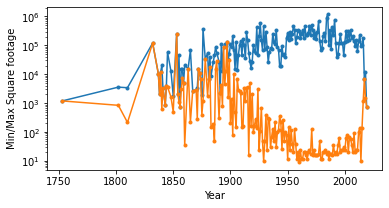

In [13]:
# Step 1: quick plot
fig, ax = plt.subplots(1,1,figsize=(6,3))
ax.plot(stats["max"], marker='.')
ax.plot(stats["min"], marker='.')
ax.set_xlabel("Year")
ax.set_ylabel("Min/Max Square footage")
ax.set_yscale('log')

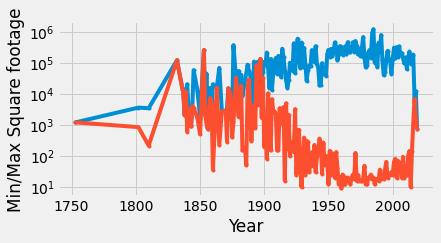

In [17]:
# Step 2: use a fixed value of some parameter I want to change
#. this case: style of the plot
with plt.style.context('fivethirtyeight'): # this style is applied ONLY to this plot and not following
    fig, ax = plt.subplots(1,1,figsize=(6,3))
    ax.plot(stats["max"], marker='.')
    ax.plot(stats["min"], marker='.')
    ax.set_xlabel("Year")
    ax.set_ylabel("Min/Max Square footage")
    ax.set_yscale('log')    

In [18]:
#plt.style.available

In [19]:
# Step 3: make our fixed parameter an input to a function
def make_plot(style):
    with plt.style.context(style): # this style is applied ONLY to this plot and not following
        fig, ax = plt.subplots(1,1,figsize=(6,3))
        ax.plot(stats["max"], marker='.')
        ax.plot(stats["min"], marker='.')
        ax.set_xlabel("Year")
        ax.set_ylabel("Min/Max Square footage")
        ax.set_yscale('log')

In [ ]:
# step 3.5 -- te